# Sales Dashboard - Data Analysis

## Project Overview  
This project aims to analyze sales data and build a dashboard for tracking key sales KPIs, trends, and performance.  

In [1]:
# Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sqlalchemy import create_engine, text
import dash
from dash import dcc, html, Input, Output

In [2]:
# Load dataset
data = pd.read_csv("sales_data.csv")

In [3]:
# Display basic info
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,11/26/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,11/26/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,3/23/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,3/23/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,5/15/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
data.columns = data.columns.str.lower()  # Convert all column names to lowercase

In [5]:
# Check for missing values
data.isnull().sum()

date                0
day                 0
month               0
year                0
customer_age        0
age_group           0
customer_gender     0
country             0
state               0
product_category    0
sub_category        0
product             0
order_quantity      0
unit_cost           0
unit_price          0
profit              0
cost                0
revenue             0
dtype: int64

In [6]:
# Drop duplicates
data = data.drop_duplicates()

In [7]:
# Summary statistics
data.describe()

,day,year,customer_age,order_quantity,unit_cost,unit_price,profit,cost,revenue
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,15.665607,2014.400925,35.919508,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
std,8.781485,1.273327,11.016543,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


## Finding out following KPIs using Python's Ploty and Dash
✅ Sales Trends (daily, monthly, yearly growth) <br>
✅ Top Products by revenue & quantity <br>
✅ Customer Segmentation (age groups, location-wise sales) <br>
✅ Seasonality Analysis (find peak sales periods)

#### 1️⃣ Sales Trends (Daily, Monthly, Yearly Growth)

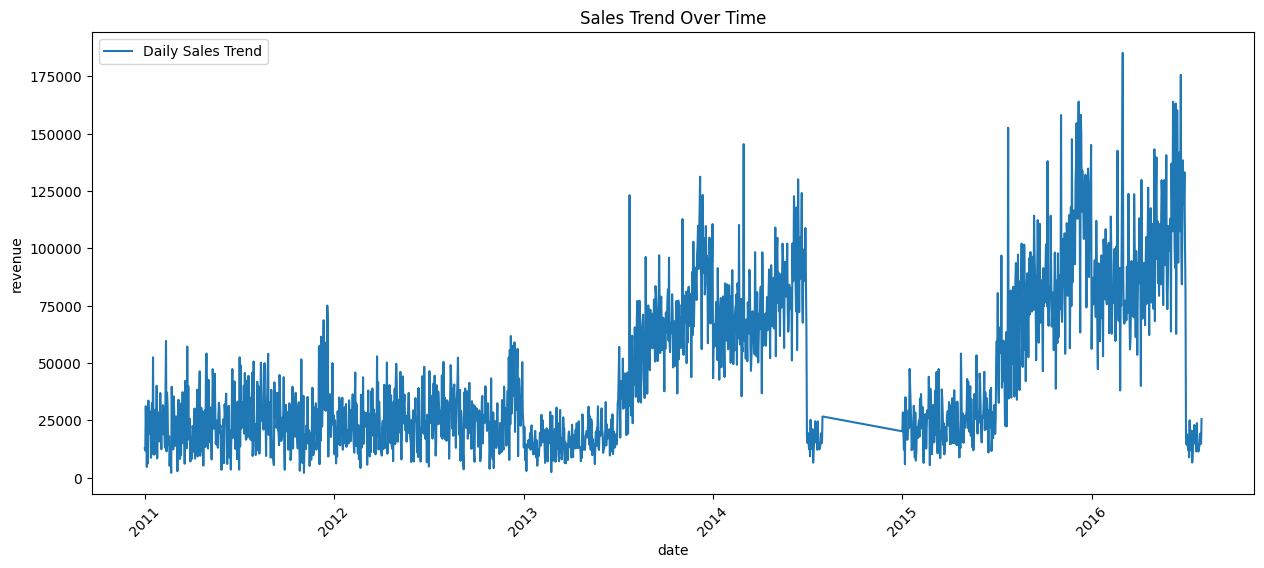

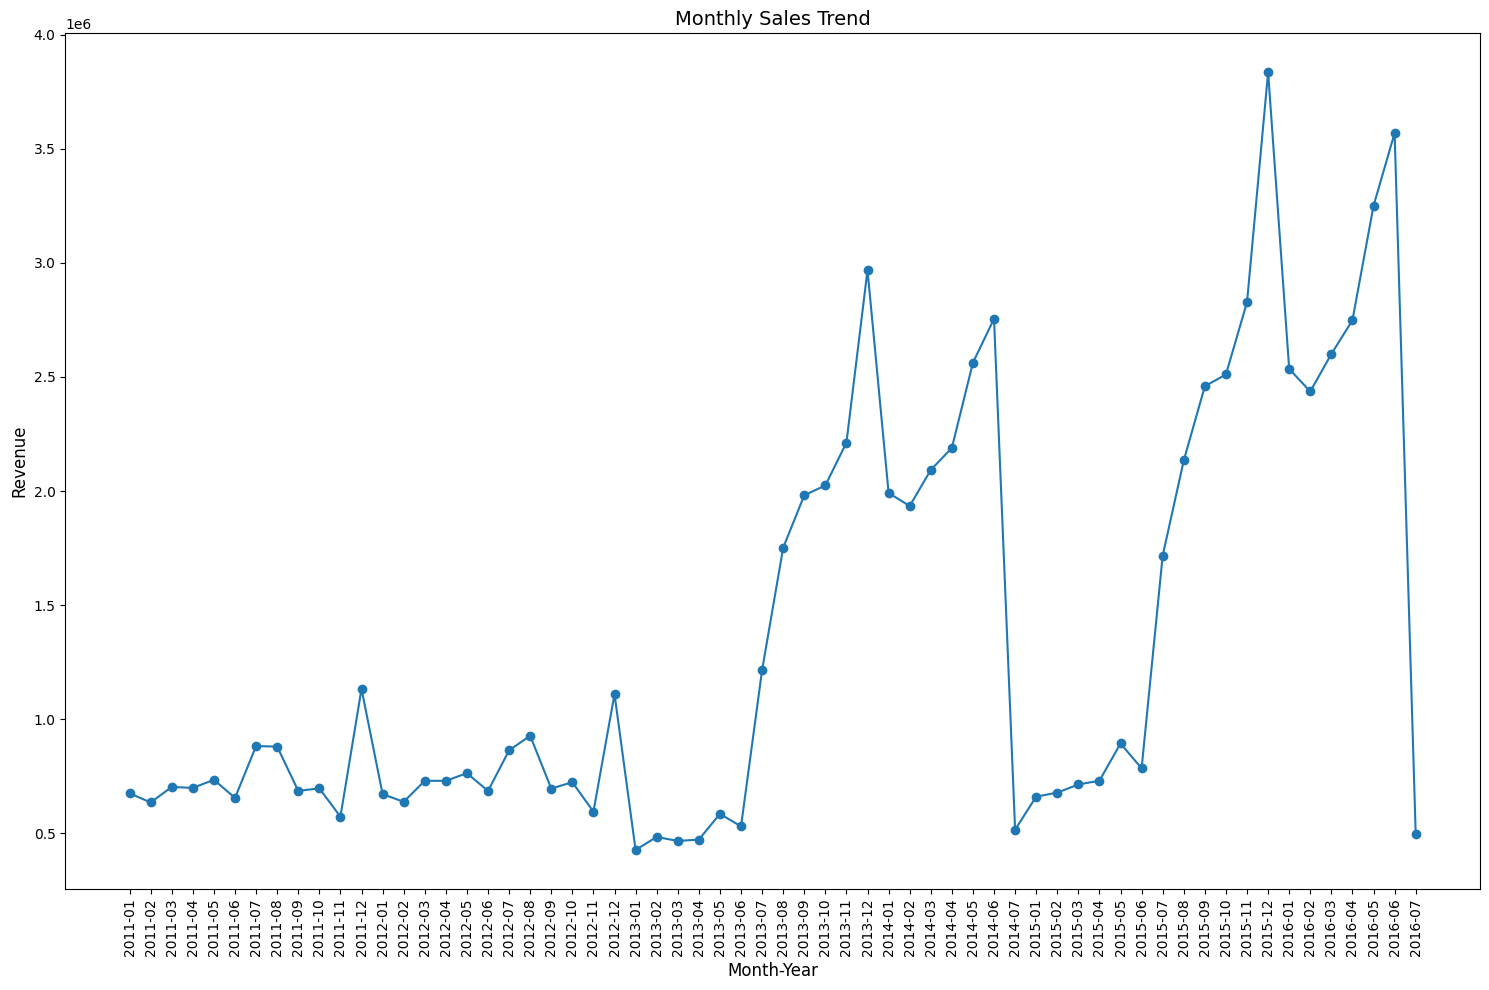

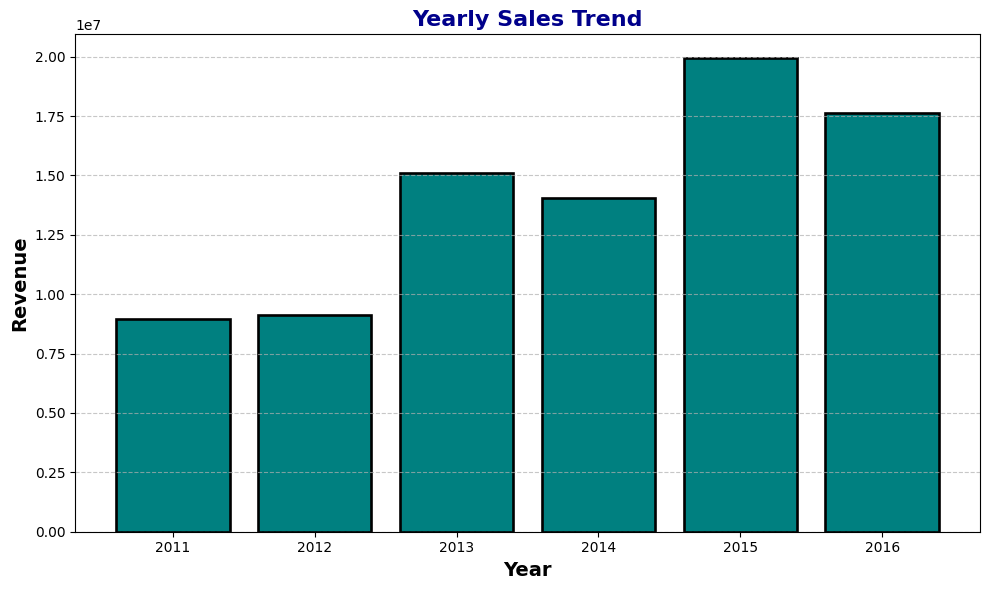

In [8]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Daily Sales Trend
daily_sales = data.groupby('date')['revenue'].sum().reset_index()

new_data = data.copy()
# Monthly Sales Trend
new_data['month_year'] = new_data['date'].dt.to_period('M')
monthly_sales = new_data.groupby('month_year')['revenue'].sum().reset_index()

# Yearly Sales Trend
yearly_sales = new_data.groupby('year')['revenue'].sum().reset_index()

# Lineplot for daily sales
plt.figure(figsize = (15,6))
fig_daily = sns.lineplot(x='date', y='revenue', data = daily_sales, label ="Daily Sales Trend")
plt.xticks(rotation = 45)
plt.title("Sales Trend Over Time")
plt.show()

# Lineplot for monthly sales
monthly_sales['month_year'] = monthly_sales['month_year'].astype(str)

plt.figure(figsize=(15,10))
fig_monthly = plt.plot(monthly_sales['month_year'],monthly_sales['revenue'], marker='o')

plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

# Lineplot for yearly sales
plt.figure(figsize = (10,6))
# Customize bar color
fig_yearly = plt.bar(yearly_sales['year'], yearly_sales['revenue'], color='teal', edgecolor='black', linewidth=1.9)

plt.title('Yearly Sales Trend', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Revenue', fontsize=14, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### 2️⃣ Top Products by Revenue & Quantity

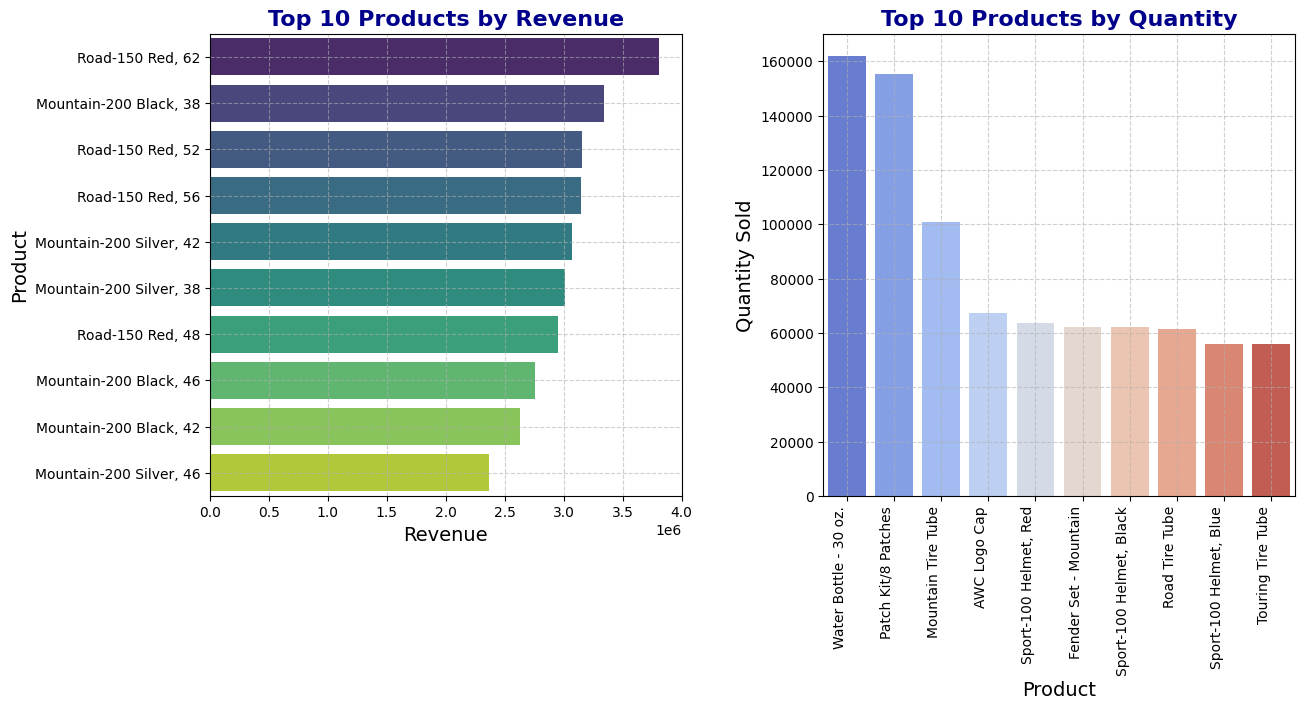

In [9]:
# Top 10 Products by Revenue
top_products_revenue = data.groupby('product')['revenue'].sum().nlargest(10).reset_index()

# Top 10 Products by Quantity
top_products_quantity = data.groupby('product')['order_quantity'].sum().nlargest(10).reset_index()

# Plot
fig, axes = plt.subplots(1,2, figsize = (14, 6))

fig_revenue = sns.barplot(x='revenue', y='product', data=top_products_revenue, ax=axes[0], palette="viridis")
axes[0].set_title('Top 10 Products by Revenue', fontsize=16, fontweight='bold', color='darkblue')
axes[0].set_xlabel('Revenue', fontsize=14)
axes[0].set_ylabel('Product', fontsize=14)

fig_quantity = sns.barplot(x='product', y='order_quantity', data=top_products_quantity, ax=axes[1], palette="coolwarm")
axes[1].set_title('Top 10 Products by Quantity', fontsize=16, fontweight='bold', color='darkblue')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 90, ha="right")
axes[1].set_xlabel('Product', fontsize=14)
axes[1].set_ylabel('Quantity Sold', fontsize=14)

for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(axis='both', labelsize=10)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.3)  # Increase the value for more space between subplots


#### 3️⃣ Customer Segmentation (Age Groups & Location-Wise Sales)

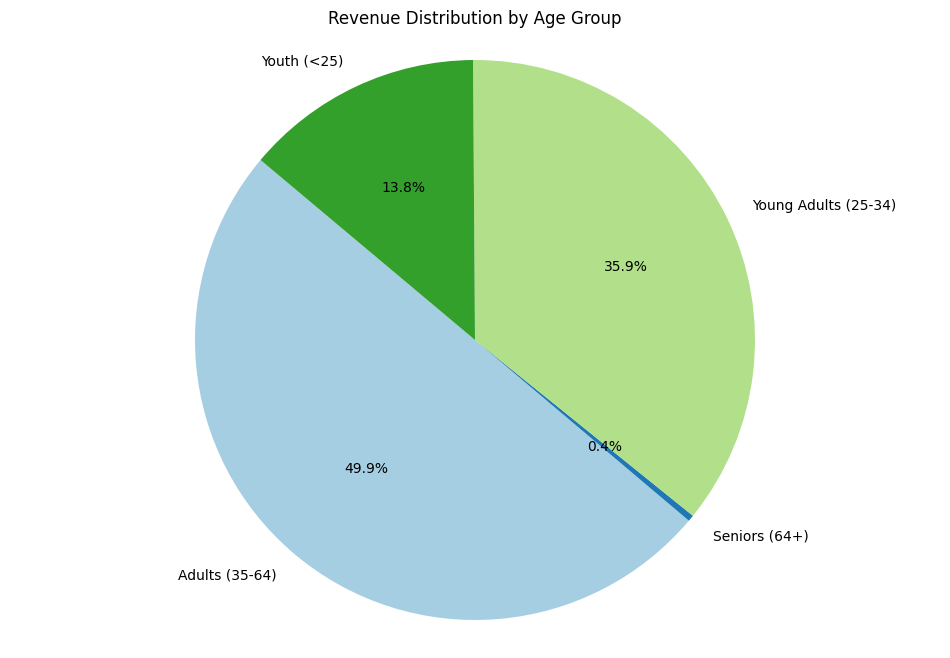

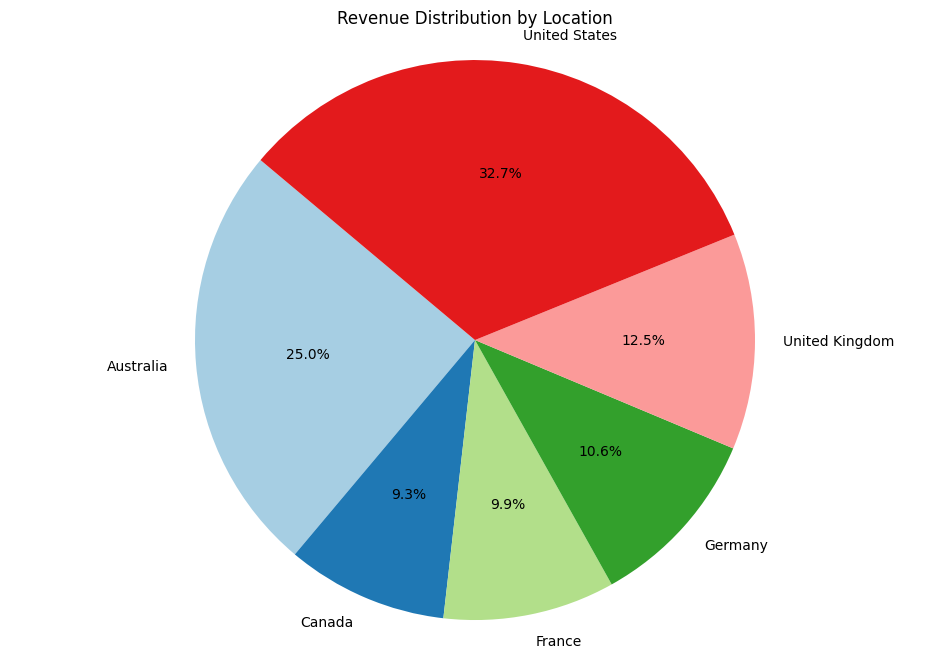

In [10]:
# Sales by Age Groups
age_sales = data.groupby('age_group')['revenue'].sum().reset_index()

# Sales by Location (Country-Wise)
location_sales = data.groupby('country')['revenue'].sum().reset_index()

# Pie Chart for Age Groups
plt.figure(figsize=(12,8))
fig_age = plt.pie(age_sales['revenue'],labels=age_sales['age_group'],autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Revenue Distribution by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

#Pie Chart for Location
plt.figure(figsize=(12,8))
fig_location = plt.pie(location_sales['revenue'], labels=location_sales['country'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Revenue Distribution by Location')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


#### 4️⃣ Seasonality Analysis (Peak Sales Periods)

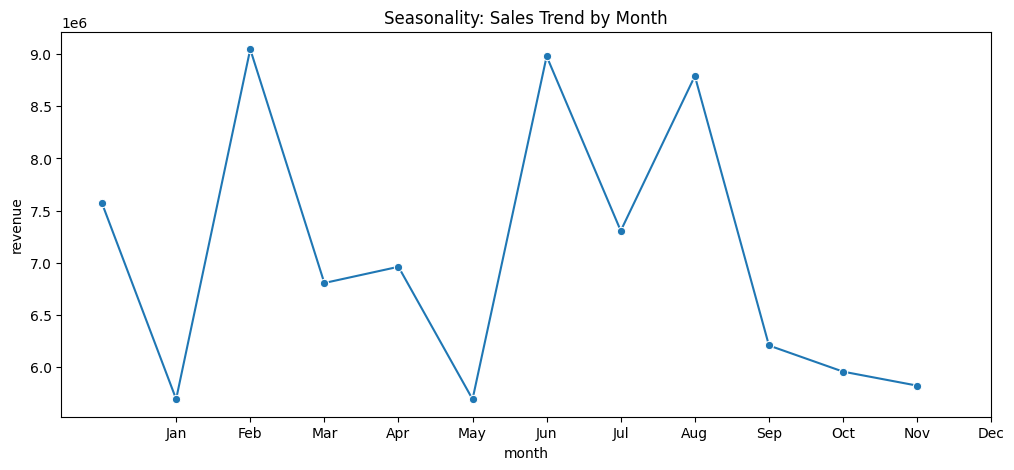

In [11]:
# Average Revenue by Month
seasonality = data.groupby('month')['revenue'].sum().reset_index()

# Plot Seasonality
plt.figure(figsize=(12,5))
fig_seasonality = sns.lineplot(x='month', y='revenue', data=seasonality, marker='o')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Seasonality: Sales Trend by Month")
plt.show()


##  Integrate Findings into Dash

In [12]:
# Create a list of months in the correct order
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("📊 Sales Dashboard", style = {'textAlign':'center'}),

    # Filters: Month and Year
    html.Div([
        html.Label("Select Month"),
        dcc.Dropdown(
            id='month-filter',
            options=[{'label': i, 'value': i} for i in months_order],
            value=None,  # Default value (None means no filter applied)
            placeholder="Select a Month"
        ),
        html.Label("Select Year"),
        dcc.Dropdown(
            id='year-filter',
            options=[{'label':str(year), 'value':year} for year in sorted(data['year'].unique())],
            value=None,  # Default value (None means no filter applied)
            placeholder='Select Year',
        )
    ], style={'padding':'20px'}),

    #Sales Trends
    html.Div([
        html.H2("Sales Trends"),
        dcc.Graph(id="sales-trend-daily"),
        dcc.Graph(id="sales-trend-monthly"),
        dcc.Graph(id="sales-trend-yearly")

    ], style={'padding': '20px'}),

    # Top Products
    html.Div([
        html.H2("Top Products by Revenue & Quantity"),
        dcc.Graph(id="top-products-by-revenue"),
        dcc.Graph(id="top-products-by-quantity")
    ], style={'padding': '20px'}),

    # Customer Segmentation
    html.Div([
        html.H2("Customer Segmentation"),
        dcc.Graph(id="customer-segmentation-by-age"),
        dcc.Graph(id="customer-segmentation-by-location")
    ], style={"padding":'20px'}),

    # Seasonality
    html.Div([
        html.H2("Seasonality Analysis"),
        dcc.Graph(id="seasonality-analysis")
    ], style = {"padding":'20px'})
])

# Sales Trend - Daily, Monthly, Yearly
@app.callback(
    Output('sales-trend-daily', 'figure'),
    Output('sales-trend-monthly', 'figure'),
    Output('sales-trend-yearly', 'figure'),
    Input('month-filter', 'value'),
    Input('year-filter', 'value')
)

def update_sales_trends(selected_month, selected_year):
    # Filter data based on selected month and year
    filtered_data = data.copy()
    if selected_month:
        filtered_data = filtered_data[filtered_data['month'] == selected_month]
    if selected_year:
        filtered_data = filtered_data[filtered_data['year'] == selected_year]

    # Daily Sales
    daily_sales = filtered_data.groupby('date')['revenue'].sum().reset_index()
    fig_daily = px.line(daily_sales, x='date', y='revenue', title='Daily Sales Trend')

    # Monthly Sales (only show if month is selected, or both month and year are selected)
    if selected_month and not selected_year:
        filtered_data['month_year'] = filtered_data['date'].dt.to_period('M')
        monthly_sales = filtered_data.groupby('month_year')['revenue'].sum().reset_index()
        monthly_sales['month_year'] = monthly_sales['month_year'].astype(str)
        fig_monthly = px.line(monthly_sales, x='month_year', y='revenue', title='Monthly Sales Trend')
    elif selected_year and selected_month:
        # If only year is selected, we show yearly graph
        fig_monthly = {}
    else:
        # Default monthly trend (if no filters are selected)
        filtered_data['month_year'] = filtered_data['date'].dt.to_period('M')
        monthly_sales = filtered_data.groupby('month_year')['revenue'].sum().reset_index()
        monthly_sales['month_year'] = monthly_sales['month_year'].astype(str)
        fig_monthly = px.line(monthly_sales, x='month_year', y='revenue', title='Monthly Sales Trend')

    # Yearly Sales (only show if year is selected)
    if not selected_year and not selected_month:
        yearly_sales = filtered_data.groupby('year')['revenue'].sum().reset_index()
        fig_yearly = px.bar(yearly_sales, x='year', y='revenue', title='Yearly Sales Trend')
    if selected_month and not selected_year:
        yearly_sales = filtered_data.groupby('year')['revenue'].sum().reset_index()
        fig_yearly = px.bar(yearly_sales, x='year', y='revenue', title='Yearly Sales Trend')
    else:
        fig_yearly = {}

    return fig_daily, fig_monthly, fig_yearly

# Top Products by Revenue & Quantity
@app.callback(
    Output('top-products-by-revenue', 'figure'),
    Output('top-products-by-quantity', 'figure'),
    Input('month-filter', 'value'),
    Input('year-filter', 'value')
)

def update_top_products(selected_month, selected_year):

    # Filter data based on selected month and year
    filtered_data = data.copy()
    if selected_month:
        filtered_data = filtered_data[filtered_data['month'] == selected_month]
    if selected_year:
        filtered_data = filtered_data[filtered_data['year'] == selected_year]

    # Top Products by Revenue
    top_products_revenue = filtered_data.groupby('product')['revenue'].sum().nlargest(10).reset_index()
    fig_revenue = px.bar(top_products_revenue, x='revenue', y='product', orientation='h', title='Top 10 Products by Revenue')

    # Top Products by Quantity
    top_products_quantity = filtered_data.groupby('product')['order_quantity'].sum().nlargest(10).reset_index()
    fig_quantity = px.bar(top_products_quantity, x='order_quantity', y='product', orientation='h', title='Top 10 Products by Quantity')

    return fig_revenue, fig_quantity

# Customer Segmentation (Age and Location)
@app.callback(
    Output('customer-segmentation-by-age', 'figure'),
    Output('customer-segmentation-by-location', 'figure'),
    Input('month-filter', 'value'),
    Input('year-filter', 'value')
)

def update_customer_segmentation(selected_month, selected_year):

    # Filter data based on selected month and year
    filtered_data = data.copy()
    if selected_month:
        filtered_data = filtered_data[filtered_data['month'] == selected_month]
    if selected_year:
        filtered_data = filtered_data[filtered_data['year'] == selected_year]

    # Sales by Age Groups
    age_sales = filtered_data.groupby('age_group')['revenue'].sum().reset_index()
    fig_age = px.pie(age_sales, names='age_group', values='revenue', title='Revenue Distribution by Age Group')

    # Sales by Location (Country-Wise)
    location_sales = filtered_data.groupby('country')['revenue'].sum().reset_index()
    fig_location = px.pie(location_sales, names='country', values='revenue', title='Revenue Distribution by Location')

    return fig_age, fig_location

# Seasonality Analysis
@app.callback(
    Output('seasonality-analysis', 'figure'),
    Input('month-filter', 'value'),
    Input('year-filter', 'value')
)

def update_seasonality(selected_month, selected_year):

     # Filter data based on selected month and year
    filtered_data = data.copy()
    if selected_month:
        filtered_data = filtered_data[filtered_data['month'] == selected_month]
    if selected_year:
        filtered_data = filtered_data[filtered_data['year'] == selected_year]

    seasonality = filtered_data.groupby('month')['revenue'].sum().reset_index()
    fig_seasonality = px.line(seasonality, x='month', y='revenue', title='Seasonality: Sales Trend by Month')
    return fig_seasonality

if __name__ == '__main__':
    app.run_server(debug=True)

In [19]:
# Define your PostgreSQL credentials
DB_NAME = 'sales_dashboard'
DB_USER = 'rkuku'
DB_PASSWORD = 'rkuku'
DB_HOST = 'localhost'
DB_PORT = '5432'
table_name = 'sales_data'

In [20]:
# Connect to PostgreSQL using SQLAlchemy
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

In [21]:
# Define the table creation query
create_table_query = """
CREATE TABLE IF NOT EXISTS sales_data (
    date DATE,
    day INT,
    month VARCHAR(20),
    year INT,
    customer_age INT,
    age_group VARCHAR(50),
    customer_gender VARCHAR(10),
    country VARCHAR(50),
    state VARCHAR(50),
    product_category VARCHAR(50),
    sub_category VARCHAR(50),
    product VARCHAR(100),
    order_quantity INT,
    unit_cost FLOAT,
    unit_price FLOAT,
    profit FLOAT,
    cost FLOAT,
    revenue FLOAT
);
"""

In [22]:
# Execute the query to create the table
with engine.connect() as conn:
    conn.execute(text(create_table_query))
    conn.commit()

print("Table 'sales_data' created successfully.")

Table 'sales_data' created successfully.


In [23]:
# Store the DataFrame in PostgreSQL
data.to_sql(table_name, engine, if_exists='append', index=False)

print("Data inserted successfully!")

Data inserted successfully!


In [24]:
data

,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
